In [1]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


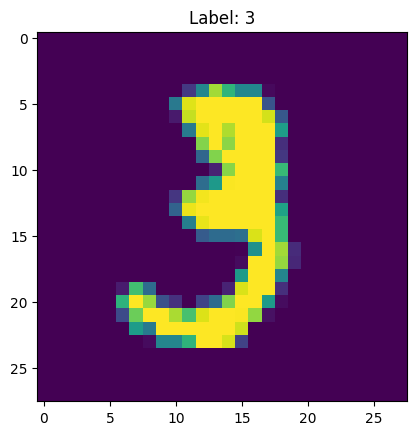

In [2]:
import matplotlib.pyplot as plt

def load_training_image(i, grey=False):
  plt.title(f"Label: {y_train[i]}")
  if grey:
    plt.imshow(X_train[i], cmap='Greys')
  else:
    plt.imshow(X_train[i])
  plt.show()

load_training_image(10)

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
import keras

img_dimensions = (28, 28)
num_classes = 10

# reshaping images to (M x N x 1)
X_train = X_train.reshape(X_train.shape[0], img_dimensions[0], img_dimensions[1], 1)
X_test = X_test.reshape(X_test.shape[0], img_dimensions[0], img_dimensions[1], 1)

# normalising pixel values to grayscale
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# categorizing labels with one hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D

In [6]:
input_shape = (img_dimensions[0], img_dimensions[1], 1)

In [10]:
# cnn

model = Sequential()
model.add(Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=input_shape
))
model.add(Conv2D(
    filters=64,
    kernel_size=(3, 3),
    activation='relu'
))
model.add(MaxPooling2D(
    pool_size=(2, 2)
))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(
    128, activation='relu'
))
model.add(Dropout(0.5))
model.add(Dense(
    num_classes, activation='softmax'
))

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
batch_size = 128
epochs = 10

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 208s 441ms/step - loss: 0.2554 - accuracy: 0.9222 - val_loss: 0.0572 - val_accuracy: 0.9818
Epoch 2/10
469/469 [==============================] - 201s 428ms/step - loss: 0.0930 - accuracy: 0.9730 - val_loss: 0.0435 - val_accuracy: 0.9854
Epoch 3/10
469/469 [==============================] - 197s 421ms/step - loss: 0.0666 - accuracy: 0.9793 - val_loss: 0.0337 - val_accuracy: 0.9888
Epoch 4/10
469/469 [==============================] - 200s 428ms/step - loss: 0.0556 - accuracy: 0.9831 - val_loss: 0.0307 - val_accuracy: 0.9900
Epoch 5/10
469/469 [==============================] - 200s 426ms/step - loss: 0.0455 - accuracy: 0.9861 - val_loss: 0.0302 - val_accuracy: 0.9898
Epoch 6/10
469/469 [==============================] - 203s 432ms/step - loss: 0.0415 - accuracy: 0.9871 - val_loss: 0.0280 - val_accuracy: 0.9907
Epoch 7/10
469/469 [==============================] - 204s 435ms/step - loss: 0.0360 - accuracy: 0.9884 - val_loss: 0.0283 -

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02464957907795906
Test accuracy: 0.9926000237464905


In [16]:
model.save("mnist-cnn.h5")